<a href="https://colab.research.google.com/github/martinpius/keras_Functional_API_architecture/blob/main/keras_functional_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
try: 
  drive.mount("/content/drive", force_remount = True)
  COLAB = True
  import tensorflow as tf
  print(f"You are using colab with tensorflow version {tf.__version__}")
except Exception as e:
  COLAB = False
  print(f"{type(e)}: {e}\n...Load your drive please...")
def time_fmt(t):
  h = int(t/(60 * 60))
  m = int(t % (60 *60) / 60)
  s = int(t % 60)
  return f"{h}:{m:>03}:{s:>05.2f}"

Mounted at /content/drive
You are using colab with tensorflow version 2.3.0


In [3]:
#Keras model can be constructed in multiple ways depending on the number of inputs/outputs or degree of customization the user desires
#to have. In this notbook we will focus on keras functional API

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation, Input, BatchNormalization, Dropout,MaxPooling2D, Conv2D
import numpy as np
import time


In [5]:
#Keras models by using functional API provides more freedom and flexibility to the model builder to customize accordingly especially
#when we have shared layers or multiple inputs/outputs.

In [6]:
#Simple expample of multilayers perceptron using keras function API
inputs = Input(shape = (560), name = 'input_shape')
x = Dense(units = 64, kernel_initializer = 'random_normal', activation = 'relu',name = 'layer_1')(inputs)
x = Dense(units = 32, kernel_initializer = 'random_normal', activation = 'relu', name = 'layer_2')(x)
x = Dropout(rate = 0.2)(x)
outputs = Dense(units = 4, activation = 'softmax')(x)
model = Model(inputs = inputs, outputs = outputs)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_shape (InputLayer)     [(None, 560)]             0         
_________________________________________________________________
layer_1 (Dense)              (None, 64)                35904     
_________________________________________________________________
layer_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 4)                 132       
Total params: 38,116
Trainable params: 38,116
Non-trainable params: 0
_________________________________________________________________


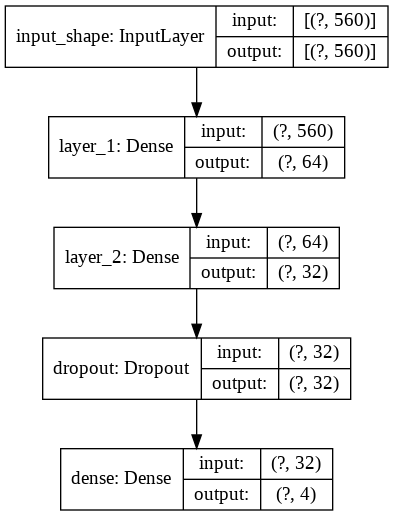

In [7]:
#We can vissualize the model
tf.keras.utils.plot_model(model, to_file = 'MLP.png',show_shapes = True)

In [8]:
# A simple MLP neural network using keras functional API with mnist data
inputs = Input(shape = (784), name = 'input_name')

In [9]:
x = Dense(units = 256, kernel_initializer = 'random_normal',activation = 'relu', name = 'layer_1')(inputs)
x = Dense(units = 128, kernel_initializer = 'random_normal', activation = 'relu', name = 'layer_2')(x)
x = Dropout(rate = 0.2)(x)
x = Dense(units = 64, kernel_initializer = 'random_normal',activation = 'relu', name = 'layer_3')(x)
outputs = Dense(units = 10,activation = 'softmax', name = 'output_layer')(x)
model = Model(inputs = inputs, outputs = outputs)



In [10]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_name (InputLayer)      [(None, 784)]             0         
_________________________________________________________________
layer_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
layer_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
layer_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
output_layer (Dense)         (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
________________________________________________

In [11]:
x1 = tf.ones(shape = (2,784))

In [12]:
#Testing our model on single fake image data format x1
model(x1)

<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
array([[0.09535516, 0.11349969, 0.1532338 , 0.10580268, 0.07122309,
        0.07723574, 0.09555843, 0.08388484, 0.13040271, 0.07380387],
       [0.09535516, 0.11349969, 0.1532338 , 0.10580268, 0.07122309,
        0.07723574, 0.09555843, 0.08388484, 0.13040271, 0.07380387]],
      dtype=float32)>

In [13]:
#using our simple cnn model created by keras functional API on MNIST dataset
#Loading the data
(x_train,y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [14]:
#Print out the shapes 
print(f"x_train_shape: {x_train.shape}, y_train_shape: {y_train.shape}\nx_test_shape :{x_test.shape}, y_test.shape: {y_test.shape}")

x_train_shape: (60000, 28, 28), y_train_shape: (60000,)
x_test_shape :(10000, 28, 28), y_test.shape: (10000,)


In [15]:
x_train, x_test = x_train.reshape(60000,784).astype('float32')/255, x_test.reshape(10000,784).astype('float32')/255


In [16]:
x_train.shape, y_train.shape

((60000, 784), (60000,))

In [17]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer = 'Adam', metrics = ['accuracy'])

In [18]:
model.fit(x_train, y_train, batch_size=16, epochs = 10, verbose = 2, validation_split=0.2)

Epoch 1/10
3000/3000 - 7s - loss: 1.5981 - accuracy: 0.8675 - val_loss: 1.5155 - val_accuracy: 0.9470
Epoch 2/10
3000/3000 - 7s - loss: 1.5210 - accuracy: 0.9400 - val_loss: 1.5107 - val_accuracy: 0.9504
Epoch 3/10
3000/3000 - 6s - loss: 1.5137 - accuracy: 0.9476 - val_loss: 1.5062 - val_accuracy: 0.9549
Epoch 4/10
3000/3000 - 7s - loss: 1.5089 - accuracy: 0.9521 - val_loss: 1.5059 - val_accuracy: 0.9553
Epoch 5/10
3000/3000 - 7s - loss: 1.5071 - accuracy: 0.9540 - val_loss: 1.5175 - val_accuracy: 0.9436
Epoch 6/10
3000/3000 - 7s - loss: 1.5075 - accuracy: 0.9535 - val_loss: 1.5098 - val_accuracy: 0.9511
Epoch 7/10
3000/3000 - 7s - loss: 1.5038 - accuracy: 0.9573 - val_loss: 1.5019 - val_accuracy: 0.9592
Epoch 8/10
3000/3000 - 7s - loss: 1.5059 - accuracy: 0.9551 - val_loss: 1.5186 - val_accuracy: 0.9425
Epoch 9/10
3000/3000 - 7s - loss: 1.5044 - accuracy: 0.9566 - val_loss: 1.5007 - val_accuracy: 0.9604
Epoch 10/10
3000/3000 - 7s - loss: 1.5068 - accuracy: 0.9542 - val_loss: 1.5115 - 

In [19]:
eval = model.evaluate(x_test, y_test, verbose= 2)
print(f"loss = {eval[0]}\naccuracy = {eval[1]}")

313/313 - 1s - loss: 1.5118 - accuracy: 0.9491
loss = 1.5118298530578613
accuracy = 0.9491000175476074


In [20]:
#Multiple models on the same graph using keras functional API
#We can define more than one model on the same graph like the case of encoder's decoder's models
#We may want to scale down the image and decodes to obtain necessary features and finaly try to 
#reconstruct the image using the representative features (encoding).
#Consider the example below

In [21]:
from tensorflow.keras.layers import Dense, Activation, BatchNormalization
from tensorflow.keras.layers import MaxPooling2D, GlobalMaxPooling2D, Conv2D,Reshape
from tensorflow.keras.layers import Conv2DTranspose, Input, UpSampling2D
from tensorflow.keras.models import Model


In [22]:
#Common input to the encoder and decoder
inputs = Input(shape = (248,248,3), name = 'input_shape') #original image

In [23]:
x = Conv2D(filters = 32, kernel_size = (3,3), strides = (2,2), padding = 'same', name = 'layer_1')(inputs)
x = Activation('relu')(x)
x = Conv2D(filters = 32, kernel_size = (3,3), strides = (2,2), padding = 'same', name = 'layer_2')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size = 3)(x)
x = BatchNormalization()(x)
x = Conv2D(filters = 16, kernel_size = (3,3), strides = (2,2), padding = 'same',activation = 'relu', name = 'layer_3')(x)
x = MaxPooling2D(pool_size = 3)(x)
encoder_out = GlobalMaxPooling2D()(x)

In [24]:
encoder = Model(inputs = inputs, outputs = encoder_out)

In [25]:
decoder_input = Input(shape = (16,), name = 'input')
x = Reshape((4,4,1))(decoder_input)
x = Conv2DTranspose(filters = 16, kernel_size = (3,3), strides = (1,1),padding = 'same')(x)
x = Activation('relu')(x)
x = Conv2DTranspose(filters = 32, kernel_size = (3,3), strides = (1,1), padding = 'valid')(x)
x = Activation('relu')(x)
x = UpSampling2D(size = (3,3))(x)
x = Conv2DTranspose(filters = 32, kernel_size = (3,3), strides = (1,1),padding = 'valid', activation = 'relu')(x)
x = UpSampling2D(size = (6,6))(x)
x = Conv2DTranspose(filters = 1, kernel_size = (3,3), activation = 'relu')(x)
x = Conv2DTranspose(filters = 3, kernel_size = (3,3),activation = 'relu')(x) #Makesure you reconstruct the original image
decoder_out = UpSampling2D(size = (2,2))(x)

In [26]:
decoder = Model(inputs = decoder_input, outputs = decoder_out)

In [27]:
encoder.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_shape (InputLayer)     [(None, 248, 248, 3)]     0         
_________________________________________________________________
layer_1 (Conv2D)             (None, 124, 124, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 124, 124, 32)      0         
_________________________________________________________________
layer_2 (Conv2D)             (None, 62, 62, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 20, 20, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 20, 20, 32)       

In [28]:
decoder.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 16)]              0         
_________________________________________________________________
reshape (Reshape)            (None, 4, 4, 1)           0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 4, 4, 16)          160       
_________________________________________________________________
activation_2 (Activation)    (None, 4, 4, 16)          0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 6, 6, 32)          4640      
_________________________________________________________________
activation_3 (Activation)    (None, 6, 6, 32)          0         
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 18, 18, 32)       

In [29]:
#Finalization of the encoder-decoder model

In [30]:
myinput = Input(shape = (248,248,3), name = 'input')
myencoder = encoder(myinput)

In [31]:
mydecoder = decoder(myencoder)

In [32]:
encoder_decoder = Model(inputs = myinput, outputs = mydecoder) #Get the autoencoder model

In [33]:
encoder_decoder.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 248, 248, 3)]     0         
_________________________________________________________________
functional_5 (Functional)    (None, 16)                14896     
_________________________________________________________________
functional_7 (Functional)    (None, 248, 248, 3)       14367     
Total params: 29,263
Trainable params: 29,199
Non-trainable params: 64
_________________________________________________________________


In [34]:
#Model with multiple outputs can also be created using functional API in keras
#Consider the following Multilayer perceptrons
def mlp_ensemble():
  inputs = Input(shape = (128,), name = 'input_shape')
  x = Dense(units = 32, kernel_initializer = 'random_normal', activation = 'relu', name = 'layer_1')(inputs)
  x = Dense(units = 16, kernel_initializer = 'random_normal', activation = 'relu', name = 'layer_2')(x)
  outputs = Dense(units = 10, activation = 'softmax', name = 'output_layer')(x)
  return Model(inputs = inputs, outputs = outputs)

In [35]:
m1 = mlp_ensemble()
m2 = mlp_ensemble()
m3 = mlp_ensemble()
m4 = mlp_ensemble()
m5 = mlp_ensemble()
inputs = Input(shape = (128,), name = 'inputs')
out_1 = m1(inputs)
out_2 = m2(inputs)
out_3 = m3(inputs)
out_4 = m4(inputs)
out_5 = m5(inputs)

ensemble_outputs = tf.keras.layers.average([out_1, out_2, out_3, out_4, out_5]) #Averaging all the outputs layer if they relate to the same thing

In [36]:
Ensemble_model = Model(inputs = inputs, outputs = ensemble_outputs, name = 'Ensemble_Model')

In [37]:
Ensemble_model.summary()

Model: "Ensemble_Model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, 128)]        0                                            
__________________________________________________________________________________________________
functional_11 (Functional)      (None, 10)           4826        inputs[0][0]                     
__________________________________________________________________________________________________
functional_13 (Functional)      (None, 10)           4826        inputs[0][0]                     
__________________________________________________________________________________________________
functional_15 (Functional)      (None, 10)           4826        inputs[0][0]                     
_____________________________________________________________________________________

In [38]:
#A multi inputs -outputs keras Model can easily be constructed using keras' functional API
#Consider the classification problems which receives data from two sorces (images and some other characteristics in contionous format)
#Note that it can be designed for any form of data
#Lets also assume that we need to classify our inputs by two possible criteria which has got subcriteria on each
#(Example we may classify the vehicle if it is a car or a bike etc and futher classify their oil consumptions into various categories)
#Note that this model must be trained from end to end 

In [39]:
#The inputs
vehicle_type_inputs = Input(shape = (248,248,3), name = 'vehicle_type')
vehicle_features_inputs = Input(shape = (100,), name = 'vehicle_features')
#Lets assume the output for first classification task has 10 classes (vehicles) and
#The output for the energy consumption of each vehicle has 4 classes (normal, median, low, high)

In [40]:
x1 = Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1), padding = 'same', name = 'Conv_layer1')(vehicle_type_inputs)
x1 = Activation('relu')(x1)
x1 = Conv2D(filters = 32, kernel_size = (3,3), strides = (2,2), padding = 'valid', name = 'Conv_layer2')(x1)
x1 = Activation('relu')(x1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size = 3)(x1)
x1 = tf.keras.layers.Flatten()(x1)


In [41]:
x1.shape

TensorShape([None, 53792])

In [42]:
x2 = Dense(units = 128, kernel_initializer = 'random_normal',activation = 'relu')(vehicle_features_inputs)
x2 = Dense(units = 64, kernel_initializer = 'random_normal', activation = 'relu')(x2)
x2 = Dropout(rate = 0.2)(x2)


In [43]:
#Merging the above features 

In [44]:
x = tf.keras.layers.concatenate([x1,x2])

In [45]:
#Add classifiers

In [46]:
pred1 = Dense(units = 10, activation = 'softmax')(x)
pred2 = Dense(units = 4, activation = 'softmax')(x)

In [47]:
#Now we can create our model using the above inputs, outputs
model = Model(inputs = [vehicle_type_inputs,vehicle_features_inputs], outputs = [pred1,pred2], name = 'Multi-inputs-outputs-Model')

In [48]:
#display the  summary and the graph
model.summary()

Model: "Multi-inputs-outputs-Model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
vehicle_type (InputLayer)       [(None, 248, 248, 3) 0                                            
__________________________________________________________________________________________________
Conv_layer1 (Conv2D)            (None, 248, 248, 32) 896         vehicle_type[0][0]               
__________________________________________________________________________________________________
activation_4 (Activation)       (None, 248, 248, 32) 0           Conv_layer1[0][0]                
__________________________________________________________________________________________________
Conv_layer2 (Conv2D)            (None, 123, 123, 32) 9248        activation_4[0][0]               
_________________________________________________________________________

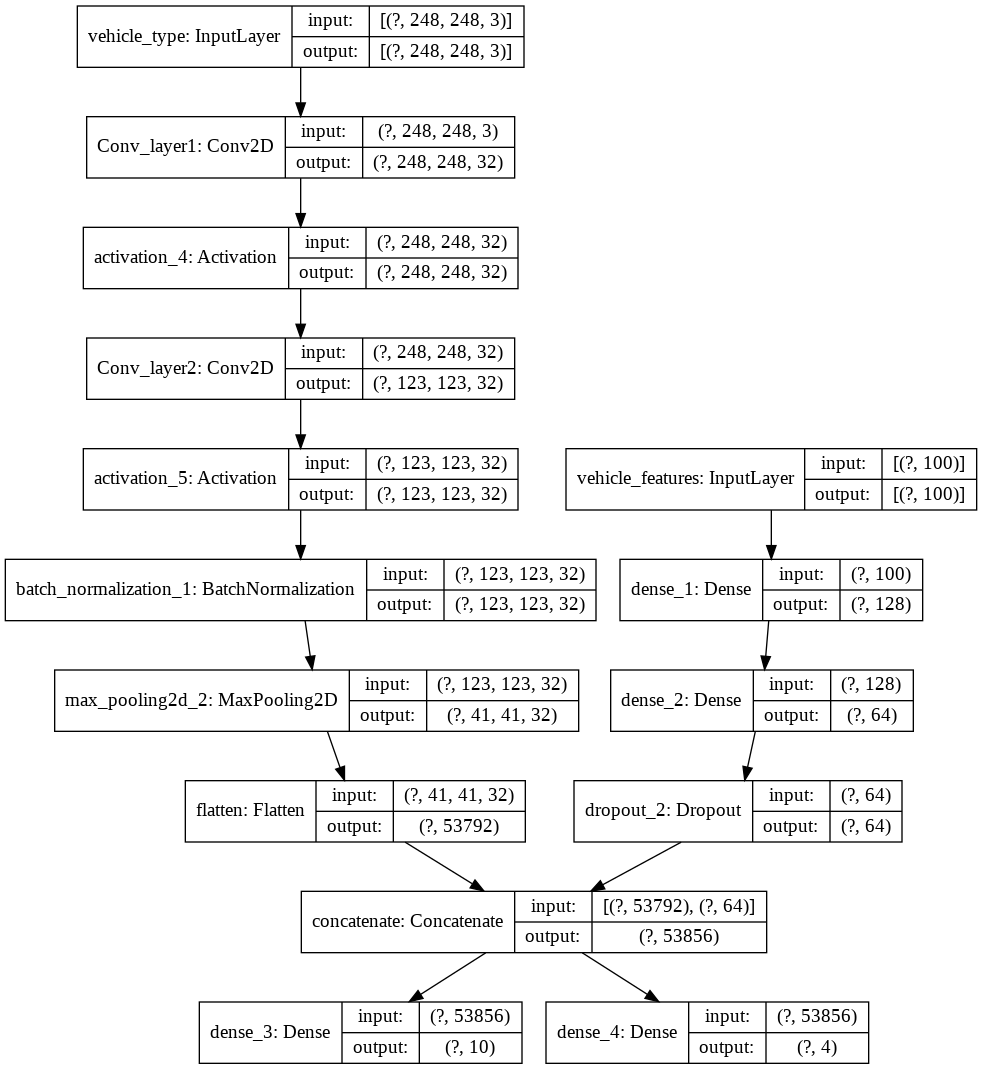

In [49]:
tf.keras.utils.plot_model(model = model, to_file = 'mymodel.png',show_shapes= True)

In [59]:
#Compiling
model.compile(loss = {'dense_3':tf.keras.losses.CategoricalCrossentropy(from_logits= False), 'dense_4':tf.keras.losses.CategoricalCrossentropy(from_logits= False)},
              optimizer = 'Adam', metrics = ['accuracy'])

In [60]:
input_1 = np.random.randint(100, size = (100,248,248,3))
input_2 = np.random.randint(100, size = (100,100))

In [61]:
input_1.shape

(100, 248, 248, 3)

In [62]:
input_2.shape

(100, 100)

In [63]:
target1 = np.random.randint(2,size = (100,10))
target2 = np.random.randint(2,size = (100,4))

In [64]:
target1.shape

(100, 10)

In [65]:
target2.shape

(100, 4)

In [66]:
 model.fit({'input1':input_1, 'input2': input_2},
          {'dense_3':target1, 'dense_4':target2}, verbose = 2, epochs = 1)

4/4 - 0s - loss: 79.8960 - dense_3_loss: 72.9409 - dense_4_loss: 6.9551 - dense_3_accuracy: 0.1800 - dense_4_accuracy: 0.2900


In [67]:
#We can also construct a more complex network easily such as CNN with residual blocks (Resnet) using keras functional API
#This is made simple due to the ability of the functional API to connect layers regardless of weather is linear or nonlinear connection

In [68]:
#Consider the simple residual network architecture using keras functional API

In [110]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout

In [111]:
inputs = Input(shape = (32,32,3), name = 'input_image')
x = Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', strides = (2,2))(inputs)
x = Activation('relu')(x)
x = Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', strides = (2,2))(x)
x =Activation('relu')(x)
x = BatchNormalization()(x)
block1_out =MaxPooling2D(pool_size = 3)(x)


x = Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', strides = (2,2))(block1_out)
x = Activation('relu')(x)
x = Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', strides = (2,2))(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)
block2_out = tf.keras.layers.add([block1_out, x])

x = Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', strides = (2,2))(block2_out)
x = Activation('relu')(x)
x = Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', strides = (2,2))(x)
x = Activation('relu')(x)
block3_out = tf.keras.layers.add([block2_out, x])

x = Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', strides = (2,2))(block3_out)
x = Activation('relu')(x)
x = GlobalAveragePooling2D()(x)
x = Dense(units = 512, activation = 'relu')(x)
x = Dropout(rate = 0.5)(x)
outputs = Dense(units = 10)(x)


In [112]:
model = Model(inputs = inputs, outputs = outputs, name = 'simple_resnet')

In [113]:
model.summary()

Model: "simple_resnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 16, 16, 32)   896         input_image[0][0]                
__________________________________________________________________________________________________
activation_27 (Activation)      (None, 16, 16, 32)   0           conv2d_21[0][0]                  
__________________________________________________________________________________________________
conv2d_22 (Conv2D)              (None, 8, 8, 64)     18496       activation_27[0][0]              
______________________________________________________________________________________

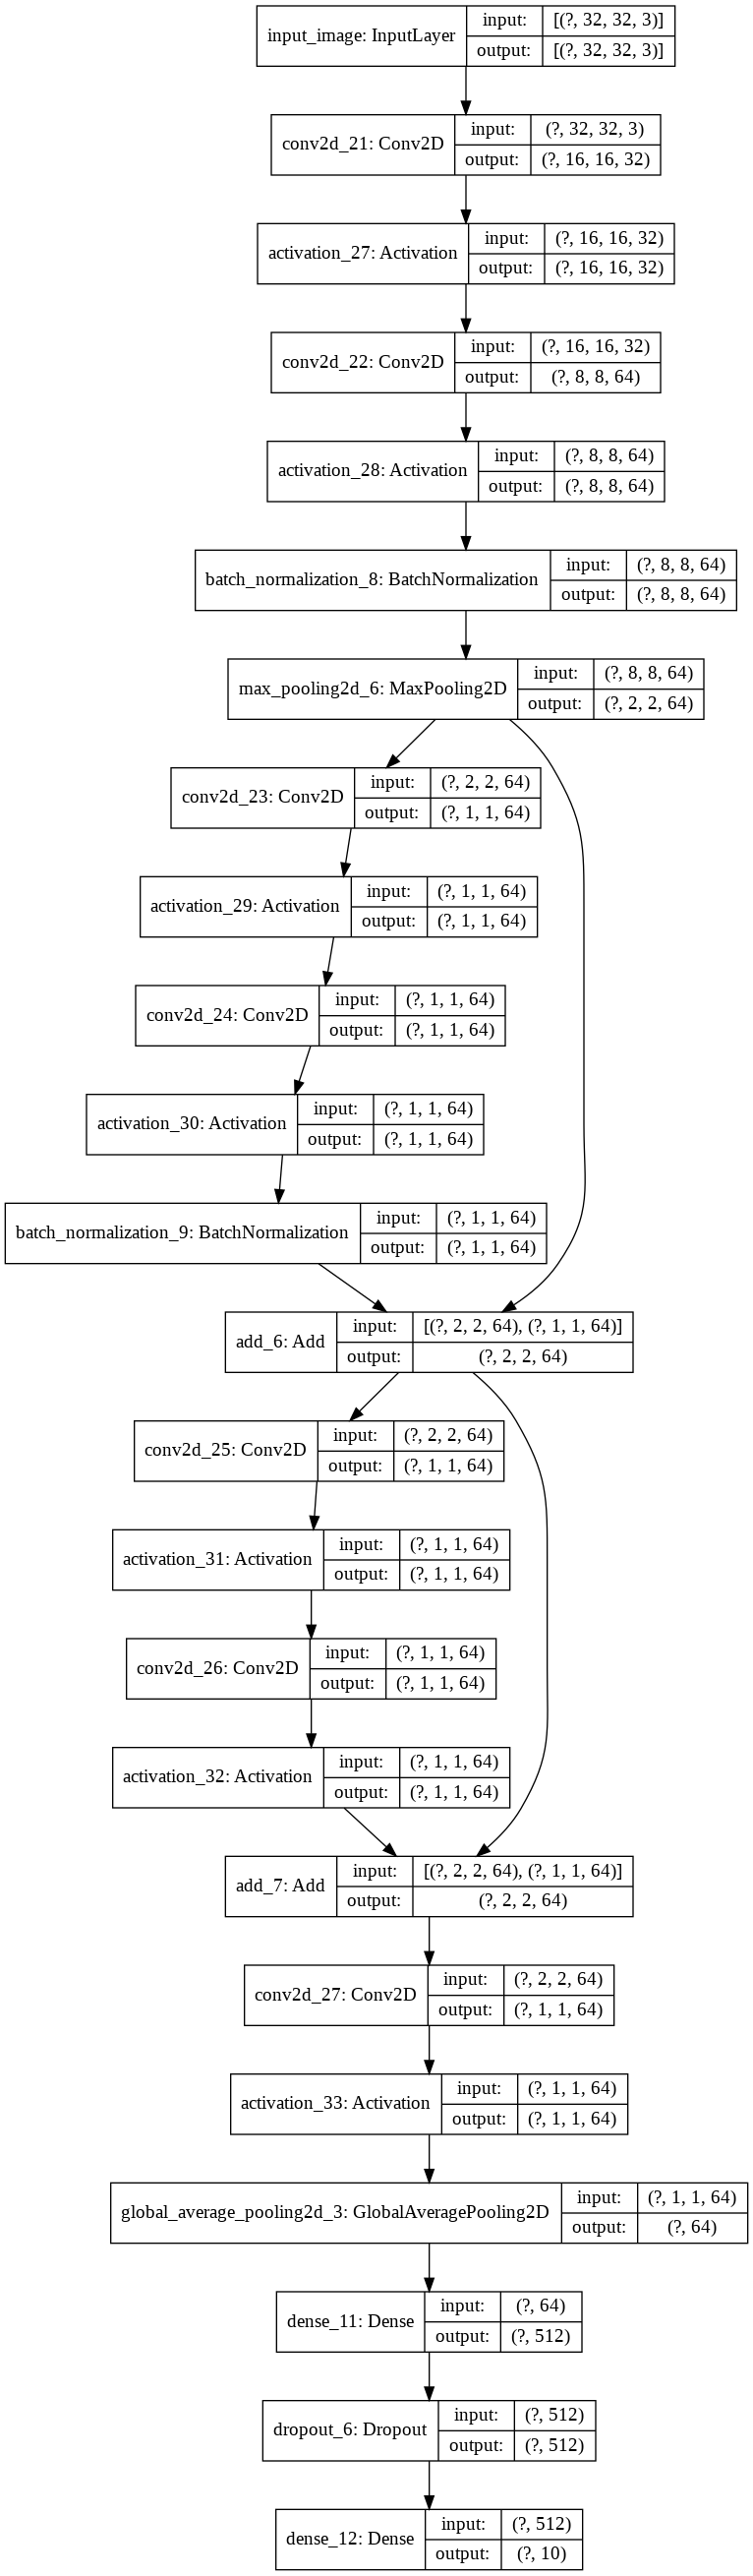

In [114]:
tf.keras.utils.plot_model(model = model, to_file = 'resnet.png', show_shapes = True)

In [115]:
#We can test this model using cifar10 data from keras pack

In [128]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

#print out the shape of train and test

In [129]:
print(f"x_train_shape: {x_train.shape} y_train_shape: {y_train.shape}\nx_test: {x_test.shape} y_test.shape {y_test.shape}")

x_train_shape: (50000, 32, 32, 3) y_train_shape: (50000, 1)
x_test: (10000, 32, 32, 3) y_test.shape (10000, 1)


In [130]:
#Preprocess the data
x_train, x_test = x_train.astype('float32')/255.0, x_test.astype('float32')/255.0
y_train, y_test = tf.keras.utils.to_categorical(y_train, 10), tf.keras.utils.to_categorical(y_test, 10)

In [131]:
#Now we can fit our model
info = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', min_delta = 1e-3,patience = 100, verbose = 1, mode = 'auto', restore_best_weights= True)

In [132]:
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True), optimizer = 'Adam', metrics = ['accuracy'])

In [133]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 1, verbose = 2, callbacks = [info])

1563/1563 - 9s - loss: 0.3031 - accuracy: 0.8936 - val_loss: 2.4578 - val_accuracy: 0.6087


In [1]:
#Extract and reuse layers in keras model produced through functional API

In [4]:
import tensorflow as tf
vgg19 = tf.keras.applications.VGG19()

574717952/574710816 [==============================] - 3s 0us/step


In [6]:
hidden_features = [layer.output for layer in vgg19.layers]

In [7]:
model_headen_feat = tf.keras.models.Model(inputs = vgg19.input, outputs = hidden_features)

In [8]:
model_headen_feat.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [12]:
fake_image = tf.ones(shape = (1,224,224,3), dtype = tf.float32)

In [17]:
out_features = model_headen_feat(fake_image)#This will be the features extracted from the fake image

In [28]:
#Smple customized keras layer from scratch (subclassing proc)
class MyDense(tf.keras.layers.Layer):
  def __init__(self, units =64):
    super(MyDense, self).__init__()
    self.units = units
  
  def build(self, input_shape):
    self.w = self.add_weight(shape = (input_shape[-1], self.units),
                            initializer = 'random_normal', trainable = True, name = 'weight')
    self.b = self.add_weight(shape = (self.units,), initializer = 'zeros', trainable = True, name = 'bias')
  
  def call(self, inputs):
    out = tf.matmul(inputs , self.w) + self.b
    return tf.nn.relu(out)

inputs = tf.keras.Input(shape = (4,10))
layer1 = MyDense(10)
outputs = layer1(inputs)

In [29]:
simpe_model = tf.keras.models.Model(inputs, outputs)

In [30]:
simpe_model.summary()

Model: "functional_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 4, 10)]           0         
_________________________________________________________________
my_dense_6 (MyDense)         (None, 4, 10)             110       
Total params: 110
Trainable params: 110
Non-trainable params: 0
_________________________________________________________________
